# Exercise 5.26

In [21]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme="grade3")


a) Fourteen small clusters are constructed into three larger clusters, which are visible in this plot.

shape of hall:  (140, 2)


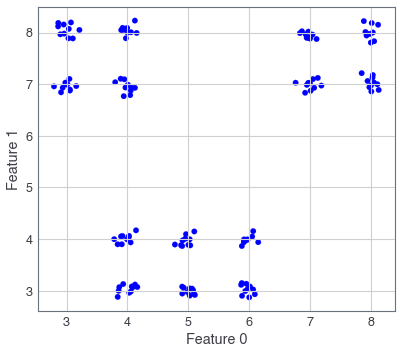

In [26]:
hall = pr.read_mat("hall")
pr.scatterd(hall)
print("shape of hall: ", hall.shape)

b) We need to consider the level of detail to determine the size of the cluster.

# Exercise 5.27

#### a) There are no vertical stems that are distinctly longer than the other. The tree grows gradually, not in leaps and bounds.

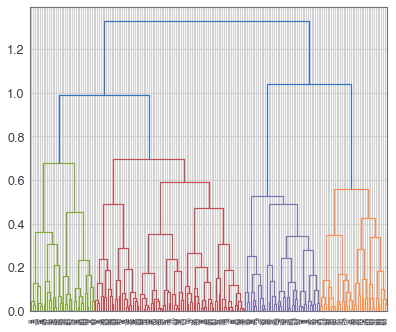

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [132.5, 132.5, 162.5, 162.5],
  [91.25, 91.25, 147.5, 147.5],
  [28.125, 28.125, 119.375, 119.375],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [185.0, 185.0, 211.25, 211.25],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [250.0, 250.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [312.5, 312.5, 342.5

In [28]:
rnd = pr.read_mat("rnd")
pr.dendro(+rnd, "complete")

#### b) I will use sklearn here instead of prtools, as they don't implement average link

In [31]:
help (pr.hclust)

Help on function hclust in module prtools.prtools:

hclust(D, ctype, K=None)
    Hierarchical Clustering clustering
    
           w = hclust(D, TYPE, K)
    
    Train the Hierarchical clustering algorithm on distance matrix D,
    using K clusters and TYPE clustering criterion. 
    When K is defined, then the list of cluster labels is returned.
    When K is not given, the full dendrogram is returned.
    
    The following clustering criteria TYPE are defined:
    'single'    uses the minimum of the distances between all
                observations of the two sets (default)
    'complete'  uses the maximum distances between all observations of
                the two sets
    'average'   uses the average of the distances of each observation of
                the two sets  (DXD: Sorry, not implemented yet!)
    Example:
    a = gendat()
    D = a*proxm(a,('city'))   # use city-block distance
    dendro = hclust(D, 'single')
    plotdg(dendro)
    
    Or:
    a = gendat()
    D =

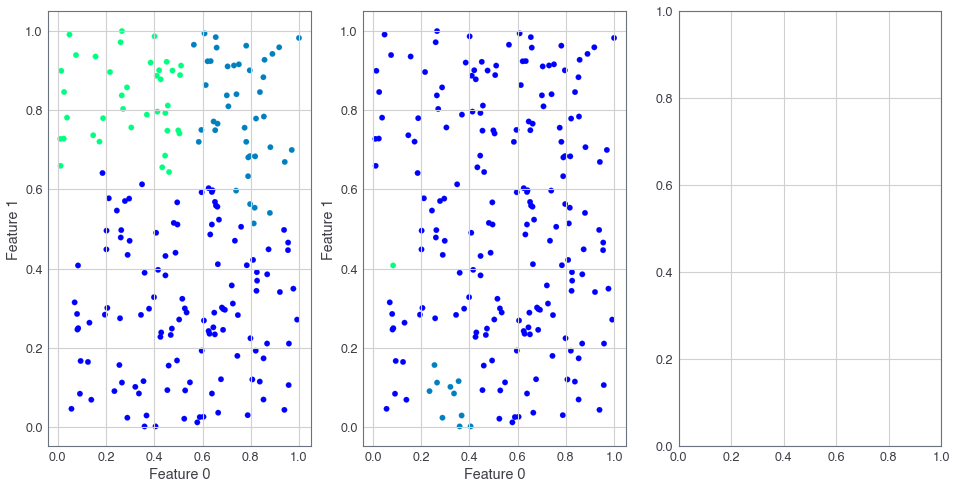

In [33]:
D = rnd*pr.proxm(rnd,('eucl',2))
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
lab_complete = pr.hclust(D, 'complete', 3)
pr.scatterd(pr.prdataset(+rnd,lab_complete))
plt.subplot(1,3,2)
lab_single = pr.hclust(D, 'single', 3)
pr.scatterd(pr.prdataset(+rnd,lab_single))
plt.subplot(1,3,3)
# # (DXD: Sorry, not implemented yet!)
# # lab_average = pr.hclust(D, 'average',3)
# # pr.scatterd(pr.prdataset(+rnd,lab_average))

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

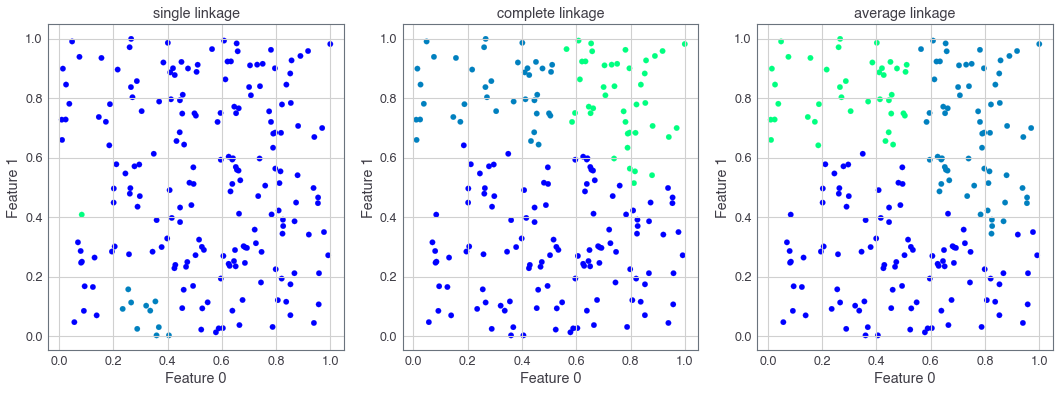

In [45]:
cluster_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(+rnd)
cluster_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(+rnd)
cluster_average = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(+rnd)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
pr.scatterd(pr.prdataset(+rnd, cluster_single.labels_))
plt.title("single linkage")
plt.subplot(1,3,2)
pr.scatterd(pr.prdataset(+rnd, cluster_complete.labels_))
plt.title("complete linkage")
plt.subplot(1,3,3)
pr.scatterd(pr.prdataset(+rnd, cluster_average.labels_))
plt.title("average linkage")
plt.show()

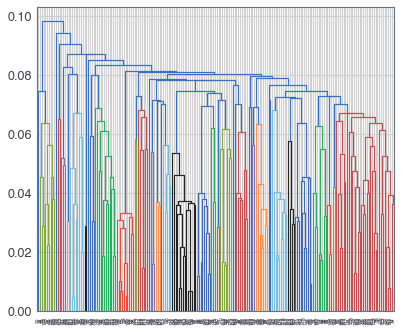

In [51]:
temp1 = pr.dendro(+rnd, "single")

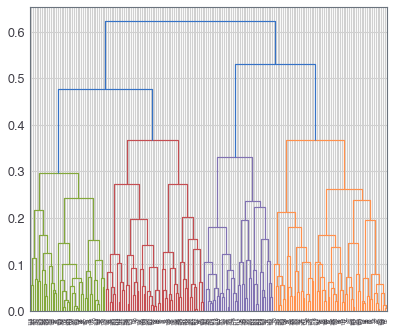

In [50]:
temp2 = pr.dendro(+rnd, "average")

#### c) In terms of average linkage, it performs almost the same as complete linkage, except for the length of the stems; however, single linkage varies from both of them. Since there are lots of "leaps" using single linkage, average and complete linkages are more suitable for this data set.

# Exercise 5.28

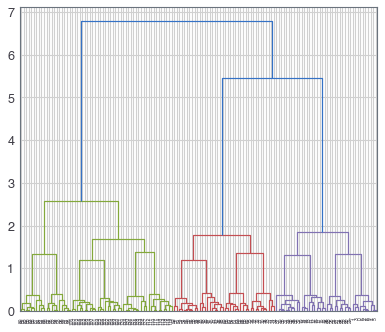

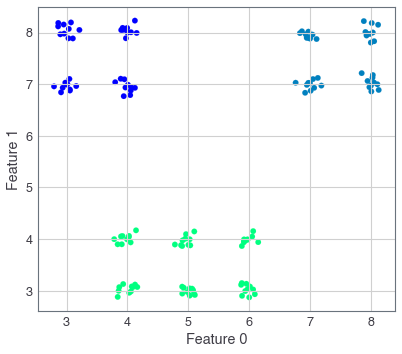

In [52]:
hall_dendro = pr.dendro(+hall,"complete")
D = hall * pr.proxm(hall,('eucl',2))
hall_complete = pr.hclust(D,'complete',3)
pr.scatterd(pr.prdataset(+hall,hall_complete))

### a) The lengths of stems correspond to the distances (single, complete or average linkage) between the two clusters being joined into one cluster by the bridge consisting of two stems and a vertical bar. Since it uses complete linkage, the distance is measured by the maximum distance between two points in their clusters separately.

### b) The closer together the samples in a cluster and the further apart the clusters, the better the clustering.

### c) For finding a good clustering, long stems correspond to large distances between clusters and therefore a potential point to cut the dendrogram.

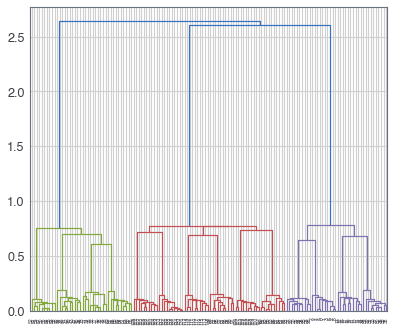

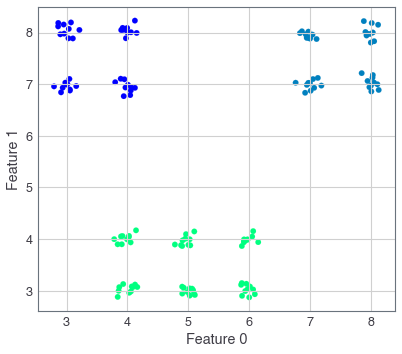

In [53]:
hall_dendro = pr.dendro(+hall,"single")
D = hall * pr.proxm(hall,('eucl',2))
hall_complete = pr.hclust(D,'single',3)
pr.scatterd(pr.prdataset(+hall,hall_complete))

### d) Yes, in the single linkage dendrogram, there are basically two lengths of vertical stems: those indicating the joining of the smallest clusters, and those indicating the joining of the larger three clusters. This is less pronounced with complete linkage.

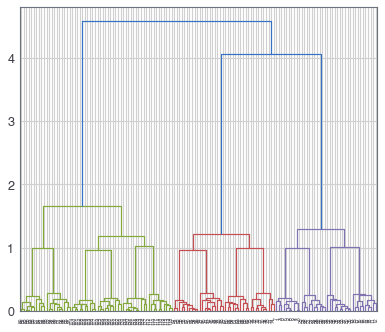

In [55]:
hall_dendro = pr.dendro(+hall,"average")


### e) The average linkage dendrogram is roughly similar to the complete linkage dendrogram.

# Exercise 5.29

In [70]:
triclust = pr.read_mat("triclust")

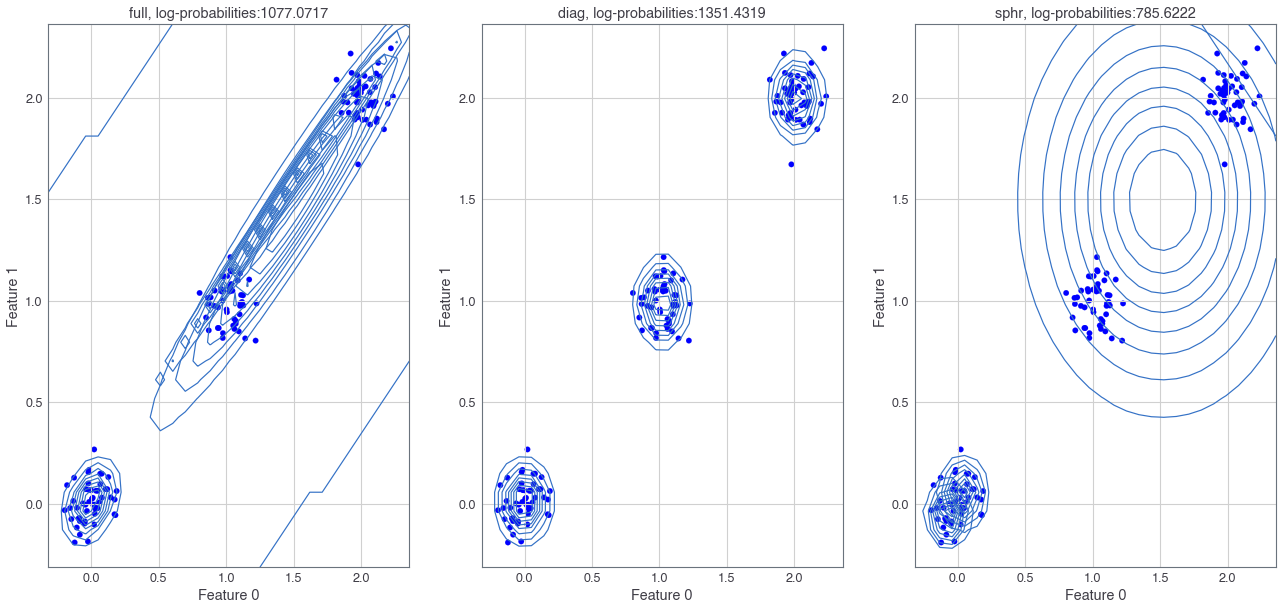

In [73]:
shape = ['full', 'diag', 'sphr']
plt.figure(figsize=(22,10))
for i in range(len(shape)):
    plt.subplot(1,3,i+1)
    w = pr.mog(triclust, (3,shape[i],0.001))
    pr.scatterd(triclust)
    pr.plotm(w)
    pred = w(triclust)
    logL = np.sum(np.log(np.sum(+pred,axis=1)))
    plt.title(shape[i]+", log-probabilities:" + str(np.round(logL,4)))
plt.show()

### a)’diag’: diagonal covariance matrix with equal variances on the diagonal 
### ’sphr’: diagonal covariance matrix with unequal variances on the diagonal 
### ’full’: unconstrained Gaussian , full covariance matrix, i.e.no constraints on the entries.

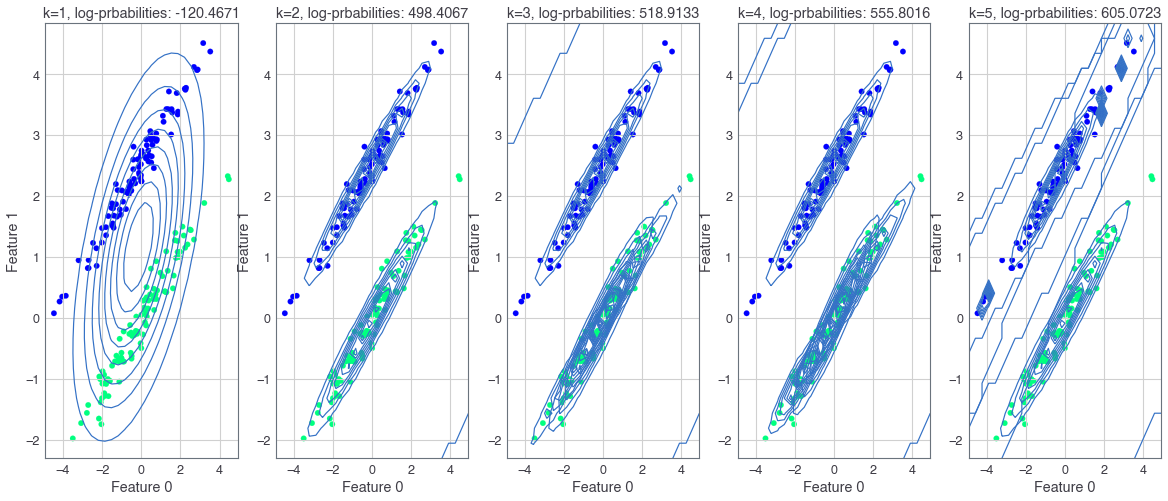

In [82]:
cigars = pr.read_mat("cigars")
plt.figure(figsize=(20,8))
for k in range(1,6):
    plt.subplot(1,5,k)
    w = pr.mog(cigars,(k,'full',0.001))
    pr.scatterd(cigars)
    pr.plotm(w)
    pred = w(cigars)
    logL = np.sum(np.log(np.sum(+pred,axis=1)))
    plt.title("k="+str(k)+", log-prbabilities: "+str(np.round(logL,4)))
plt.show()

### b) The optimum k is 2.

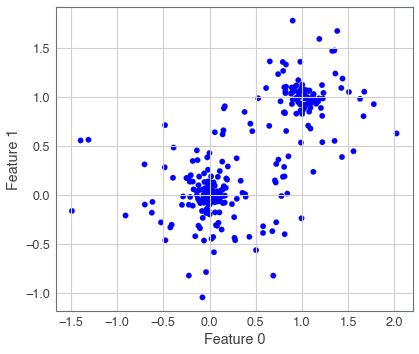

In [83]:
messy = pr.read_mat("messy")
pr.scatterd(messy)
# 2 clusters

log-probabilities:  1411.18065067117


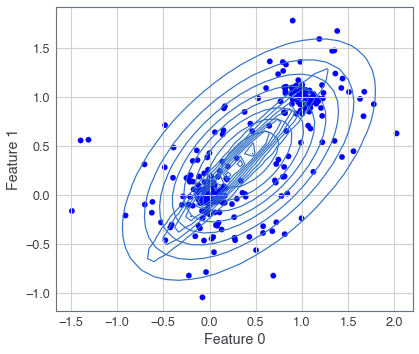

In [84]:
w = pr.mog(messy, (2,'full',0.001))
pr.scatterd(messy)
pr.plotm(w)
pred = w(messy)
logL = np.sum(np.log(np.sum(+pred,axis=1)))
print("log-probabilities: ",logL)

log-probabilities:  1568.9940324369745


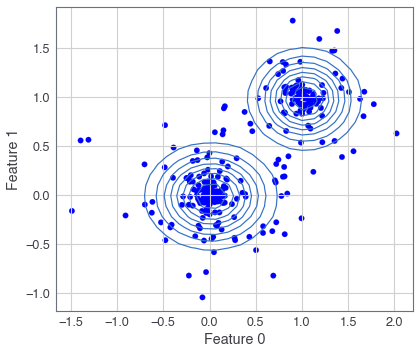

In [85]:
w = pr.mog(messy, (2,'diag',0.001))
pr.scatterd(messy)
pr.plotm(w)
pred = w(messy)
logL = np.sum(np.log(np.sum(+pred,axis=1)))
print("log-probabilities: ",logL)

log-probabilities:  1556.1120493161807


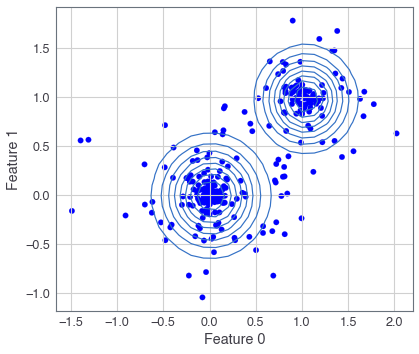

In [86]:
w = pr.mog(messy, (2,'sphr',0.001))
pr.scatterd(messy)
pr.plotm(w)
pred = w(messy)
logL = np.sum(np.log(np.sum(+pred,axis=1)))
print("log-probabilities: ",logL)

### c) The optimum k is 2 and the optimum type of Gaussian is "diag".

# Exercise 5.31

a) g=3, triclust

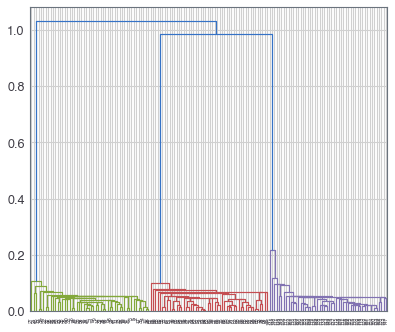

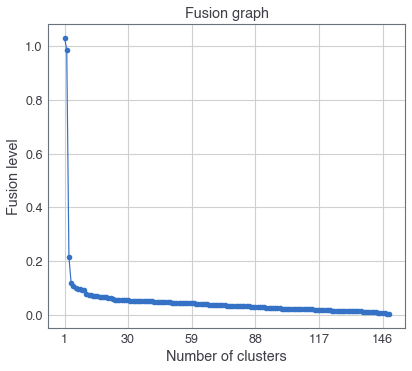

In [88]:
triclust = pr.read_mat("triclust")
triclust_fusion = pr.fusion_graph(+triclust, 'single')

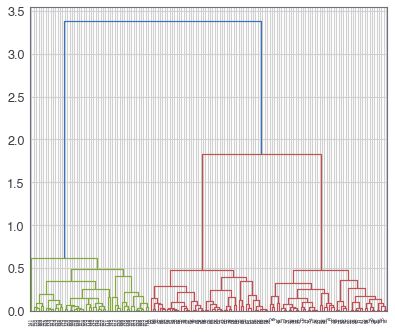

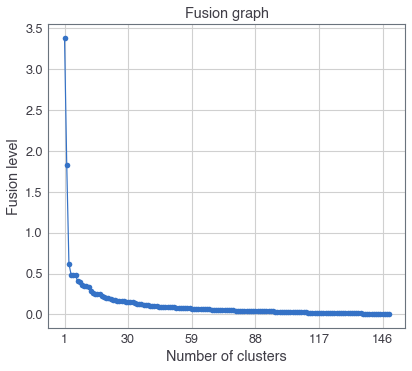

In [89]:
triclust_fusion = pr.fusion_graph(+triclust, 'complete')

#### b)The fusion graph is ambiguous about the exact number of clusters: either two or three clusters are associated with large fusion jumps of roughly the same magnitude. This is due to the complete linkage distance: distance between furthest samples of clusters at (0, 0) and (1, 1) (which are merged to result from a total of two clusters) is roughly half the distance between the distance between the furthest samples in the cluster at (0, 0) and (2, 2), which are merged to result in a single cluster. In single linkage this does not occur, since the minimal distances between the clusters at (0, 0) and (1, 1) is the same as the minimal distance between the clusters at (1, 1) and (2, 2).

# Exercise 5.32

In [93]:
hall = pr.read_mat("hall")

<Figure size 1440x576 with 0 Axes>

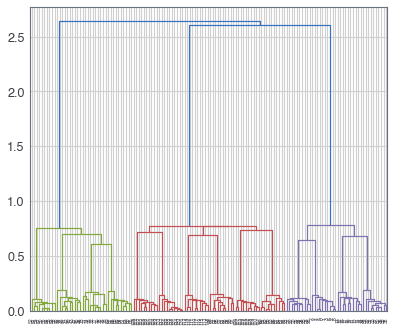

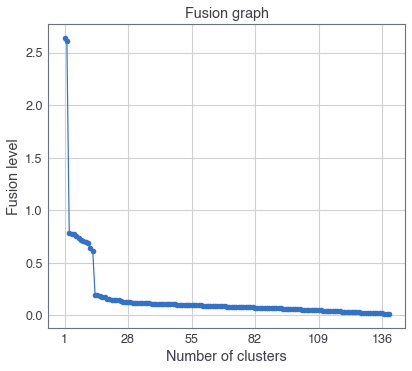

In [94]:
plt.figure(figsize=(20,8))
pr.fusion_graph(+hall,'single')

### There are two pronounced jumps, at 3 and 14 clusters.

# Exercise 5.33

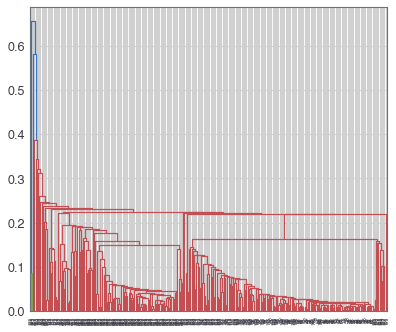

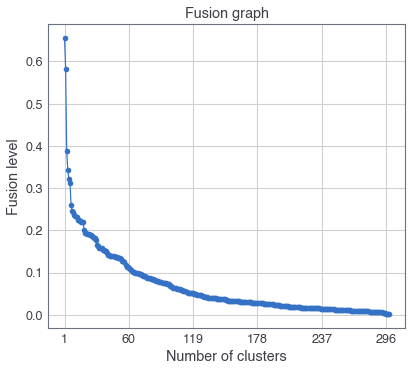

In [95]:
messy = pr.read_mat("messy")
pr.fusion_graph(+messy,'single')

### a) At three clusters, since the largest fusion jump occurs at g = 3.

### b) In the dendrogram, the first two clusters only contain some outliers while all the other points are in the third cluster.

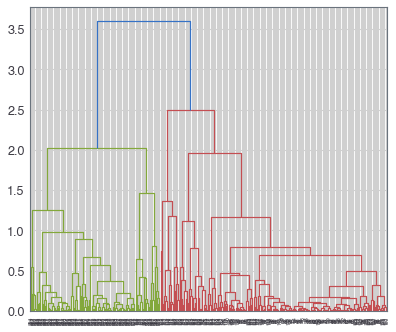

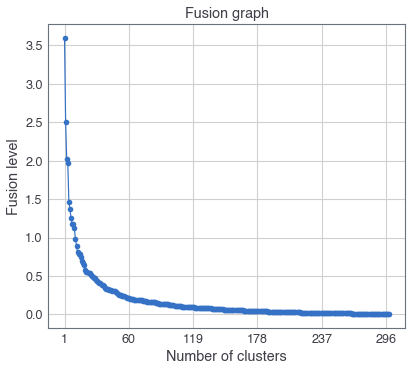

In [96]:
pr.fusion_graph(+messy,'complete')

### c) g=2. The complete linkage is better. Although the size of the fusion jump is not very convincing, the resulting clustering is better.

# Exercise 5.34

### Formally, this measure is known as the Davies-Bouldin index (DBI). It assumes that clusters are spherical, and that a desirable clustering consists of compact clusters that are well-separated. (组内距离最小，组间距离最大)

there are g clusters;
the mean of a cluster is its centroid, denoted as $\mu_j$, and the 2-norm distance between centroids $|| \mu_j - \mu_k ||$ represents the distance between clusters.
the standard variance of a cluster $\sigma_j$ represents its distances within the cluster.$$\sigma_j = \sqrt{\frac{1}{n_j} \sum_{x_i\in C_j}||x_i-\mu_j||^2}$$
DBI score:$$R_{jk} = \frac{\sigma_j+\sigma_k}{|| \mu_j-\mu_k ||}, \ j,k=1,2,3...,g; \ k\neq j$$we **expect** this score as small as possible, as "clustering consists of compact clusters that are well-separated".
If there are many pairs (g>2), then $R_j=max_{k=1,2,...g; k\neq j} R_{jk}$ <- We take the worest case as consideration
Davies-Bouldin index:$$I_{DB} = \frac{1}{g} \sum_{j=1}^g R_j$$

a) test **dbi** function

In [97]:
help(pr.dbi)

Help on function dbi in module prtools.prtools:

dbi(a, lab)
    Davies-Bouldin Index
    
           e = dbi(A, Y)
    
    Computes the Davies-Bouldin score for features A and clustering
    labels Y.
    The outcomes differ from the sklearn implementation, because
    that one is wrong (switched the order of 'mean' and 'sqrt'). 
    
    Example:
    a = gendat()
    lab = prkmeans(+a, (3, 150, 'random'))
    e = dbi(+a, lab)



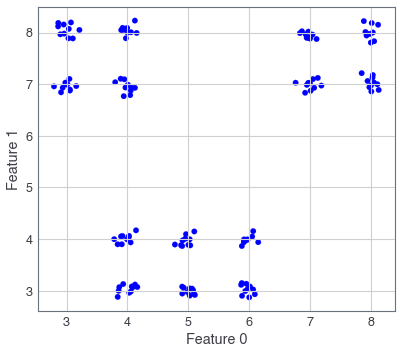

In [98]:
pr.scatterd(hall)

In [103]:
help (AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed", a dis

In [101]:
# g=3

hall_cluster_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(+hall)
e = pr.dbi(+hall, hall_cluster_single.labels_)
print("DBI of hall_cluster_single: ", e)

DBI of hall_cluster_single:  0.389130779261571


In [102]:
# g=14

hall_cluster_single = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='single').fit(+hall)
e = pr.dbi(+hall, hall_cluster_single.labels_)
print("DBI of hall_cluster_single: ", e)

DBI of hall_cluster_single:  0.26184506782678124


In [104]:
# g=5

hall_cluster_single = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single').fit(+hall)
e = pr.dbi(+hall, hall_cluster_single.labels_)
print("DBI of hall_cluster_single: ",e)

DBI of hall_cluster_single:  0.7613479379749362


### b) The number of clusters is expected to be 3.

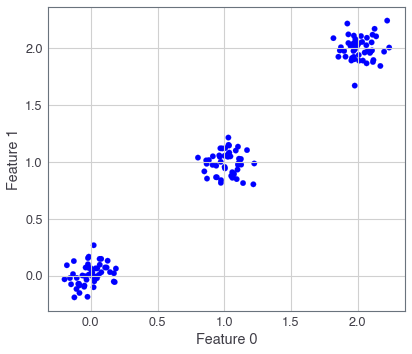

In [105]:
pr.scatterd(triclust)

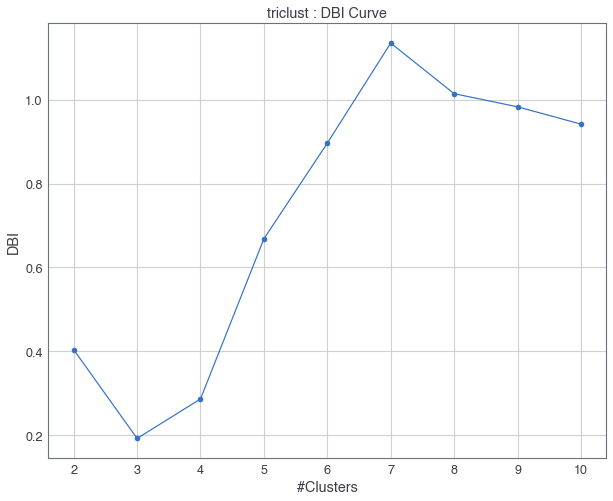

In [110]:
dbi = np.zeros([9])
for n in range(2,11):
    triclust_cluster_single = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete').fit(+triclust)
    e = pr.dbi(+triclust, triclust_cluster_single.labels_)
    dbi[n-2] = e
plt.figure(figsize=(10,8))
plt.plot(np.arange(2,11),dbi,"-o")
plt.title("triclust : DBI Curve")
plt.xlabel("#Clusters")
plt.ylabel("DBI")
plt.show()

### The minimum DBI is 0.2 where the number of clusters is three. 

### c)

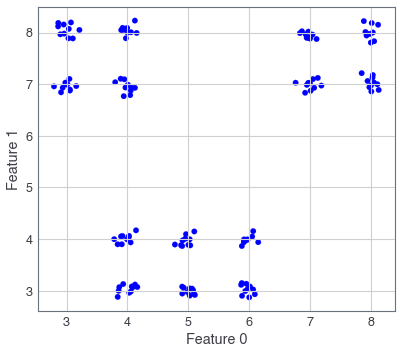

In [111]:
pr.scatterd(hall)

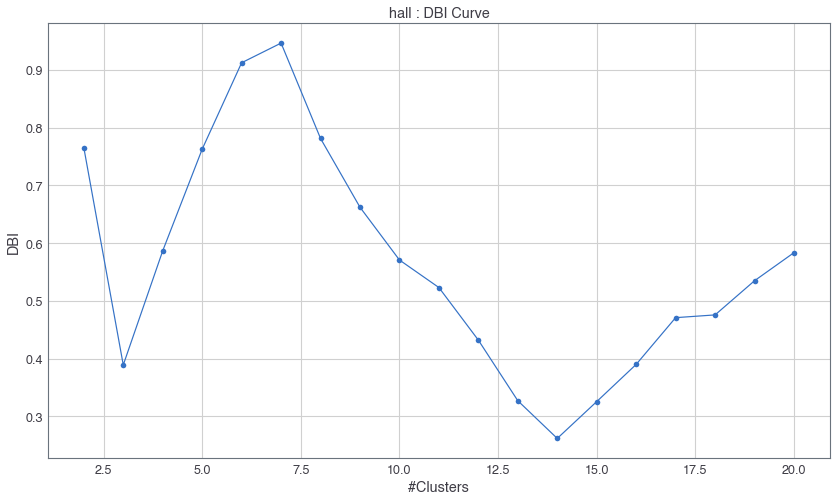

In [113]:
dbi = np.zeros([19])
for n in range(2,21):
    hall_cluster_single = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete').fit(+hall)
    e = pr.dbi(+hall, hall_cluster_single.labels_)
    dbi[n-2] = e
plt.figure(figsize=(14,8))
plt.plot(np.arange(2,21),dbi,"-o")
plt.title("hall : DBI Curve")
plt.xlabel("#Clusters")
plt.ylabel("DBI")
plt.show()

There is a **pronounced minimum at 3 clusters** and a **slightly larger minimum at 16 clusters**. The ﬁrst minimum (3 clusters) corresponds to the situation where the smaller clusters are grouped in three large clusters (four in top-left, four in top-right and six at the bottom) while **the minimum at 16** corresponds to the **ﬁne cluster structure** in the data. The peak at sixteen is more pronounced since the ratio of the maximal within-scatter to the minimal distance between any pair of these clusters is smaller than for the three cluster conﬁguration.